# COGS 108 - Final Project 

# Group Members

- A91052905 Zijun Chen
- A91084903 Wenjia Chen
- A98064987 Fang Jung Chang
- A91027719 Siru A
- A92066748 Chenxin Tian

In [1]:
# Imports -  Import the packages that we need.
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind
import seaborn as sns


## Setup

Data: Accident Data(AccidentData.csv in this folder)
- Link: https://drive.google.com/drive/folders/0B0VFVih5Y8NyQklZb0VMa1dLRFk?usp=sharing
- There are 1741 observations, classified into seven features.

Research Question: What is correlation between the death rate of car accidents in California and the number of lanes on roads, speed limit, and drunk drivers?

Hypothesis: 
Car accidents with higher death rates were happened in areas with higher speed limit and less lanes, as well as with drunk drivers involved.

Background: 
- According to many reports and news, unintentional injuries is listed as one of the top five leading causes of death in the U.S, and car accidents and road injury are considered as part of the unintentional injuries. We want to use this project as an opportunity to analyze the potential factors that cause the fatal car accidents, and more importantly, to better understand how we can prevent car accidents as well as improve awareness of the dangers of driving.
- Driving at the driving speed limit is particularly important because the speed limit is to ensure the safety of the driver and the drivers around. Speed limits are designed not only for maximum speeds but also minimum speeds. Sometimes driving too slow is sometimes dangerous because it blocks and impedes the traffic. Having considered driving on the road with different speed limits, our group hypothesizes that driving in the areas with higher speed limits is more dangerous and more likely to cause car accidents. The hypothesis is inspired from a research done at Monash University in 1982. They studied the reaction time of drivers to road stimuli, and concluded that the average reaction time is less than 2.5 seconds. It means that within this 2.5 seconds, a driver is expected to read and process the road signs, recognize a stimuli, and then decide his behavior accordingly and appropriately. Based on this study, we believe that driving in higher speed limits road would cause more car accidents because driving fast requires more cognitive load such as attention, recognition, and problem solving. Psychologically, it is more stressful and challenging.
- To explain the next hypothesis that fewer lanes are more likely to bring car accidents, we look into the benefits of lanes splitting. A study done at UC Berkeley in 2015 reported that lane-splitting is safe if done in traffic moving at 50 mph or less.
We believe that more lanes allow drivers to have more space to avoid hitting a car, and to adjust driving speed and distance. Another reason is that more lanes usually mean separated lanes for trucks, buses, motorcyclists, bikes, or carpools. Designating different lanes for different sizes of car and types of transportation can avoid blind spots as well as speed differences between a large vehicle and a smaller motorcycle.

References: 
- Leading Causes of Death: https://www.cdc.gov/nchs/fastats/leading-causes-of-death.htm
- Study About Driver’s Reaction Time: Triggs, T. J., & Harris, W. G. (1962). and sub-title. Experimental Psychology, 64, 280-287. https://www.monash.edu/__data/assets/pdf_file/0003/217641/hfr12.pdf
- Motorcycle Lane-splitting and Safety in California： Rice, T., Troszak, L., & Erhardt, T. (2015). Motorcycle Lane-splitting and Safety in California. http://www.ots.ca.gov/pdf/Publications/Motorcycle-Lane-Splitting-and-Safety-2015.pdf

## Part 1: Load & Clean the Data
- Since we are only studying the number of lanes on roads, speed limit, and number of drunk drivers involved in each accidents and their relationship with death rate accidents, we will drop the other columns of variables: number of vehicles involved in the crash (VE_TOTAL), and number of pedestrians involved in the crash (PEDS). 
- By cleaning our dataset in this way, we are able to better focus on the variables we are interested in.
- Also, we need to calculate the death rate (D_RATE) by dividing the number of people dead in each accident (FATALS) by the total number people people involved in each accident (PERSONS)

In [2]:
# 1a) Import the data in the file 'AccidentData.csv' into a DataFrame, called 'df'.

df = pd.read_csv('AccidentData.csv')
#df

In [3]:
# 1b) drop the following columns of variables: 
# number of vehicles involved in the crash (VE_TOTAL)
# number of pedestrians involved in the crash (PEDS).

df = df.drop('VE_TOTAL', axis=1)
df = df.drop('PEDS', axis=1)
#df

In [4]:
# 1c) Calculate the death rate in each car accidents by dividing 'Fatals' with 'Persons'
# add the data into a new column, called 'D_RATE' in df

D_RATE = df['FATALS']/(df['PERSONS'])
df['D_RATE'] = D_RATE
df

,PERSONS,NO_LANES,SP_LIMIT,FATALS,DRUNK_DR,D_RATE
0,2,3,0,1,0,0.500000
1,1,2,0,1,1,1.000000
2,3,2,0,1,0,0.333333
3,2,2,0,1,0,0.500000
4,6,2,0,3,0,0.500000
5,8,2,15,1,0,0.125000
6,2,2,15,1,1,0.500000
7,2,2,15,1,2,0.500000
8,1,2,20,1,1,1.000000
9,2,2,20,1,0,0.500000


## Part 2: Data Vizualization

Below are the data visualizations about number of lanes invloved in car accidents

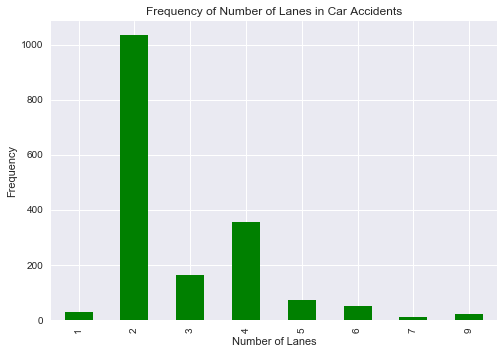

In [5]:
# 2a1) Plot a bar graph showing the number of lanes in each car accidents.
# Use 'value_counts' to get the counts for number of lanes.
# Save the plot as 'no_lanes'

lanes_nu = df['NO_LANES']
lanes_number = lanes_nu.value_counts(normalize=False, sort=False, ascending=False, bins=None, dropna=True)
no_lanes = lanes_number.plot.bar(x="number of lanes", y="frequency",facecolor='green')
plt.title('Frequency of Number of Lanes in Car Accidents')
plt.xlabel('Number of Lanes')
plt.ylabel('Frequency')

no_lanes = plt.gcf()

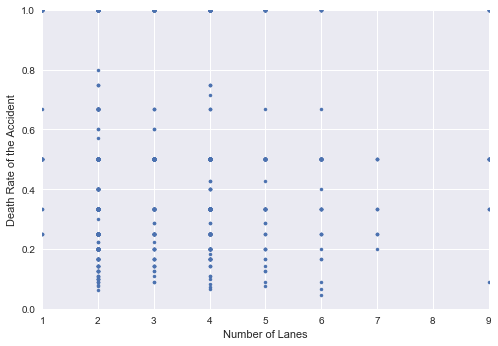

In [6]:
# 2a2) draw a scatter plot to see the general trend associated and 
# whether there is a possible linear or nonlinear relationship between 
# the number of lanes on roads and the death rate.

#If the distribution of data is not significant for viewing, use a log transform to transform the data and then plot

f, ax = plt.subplots()
ax.plot(lanes_nu, D_RATE, '.')
plt.xlabel('Number of Lanes'); plt.xlim([1, 9]);
plt.ylabel('Death Rate of the Accident'); plt.ylim([0, 1]);


Below are the data visualizations about speed limits in car accidents

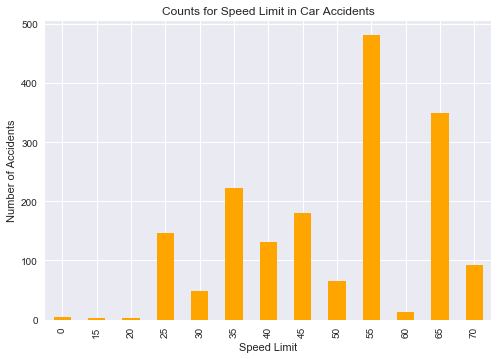

In [7]:
# 2b1) Plot a bar graph showing the speed limit in each car accidents.
# Use 'value_counts' to get the counts for speed limits.
# Save the plot as 'sp_limit'


splm = df['SP_LIMIT'].value_counts(normalize=False, sort=False, ascending=False, bins=None, dropna=True)
sp_limit = splm.plot.bar(facecolor='orange')
#sp_limit2 = plt.hist(df['SP_LIMIT'], facecolor = 'orange')
plt.title('Counts for Speed Limit in Car Accidents')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Accidents')
sp_limit = plt.gcf()


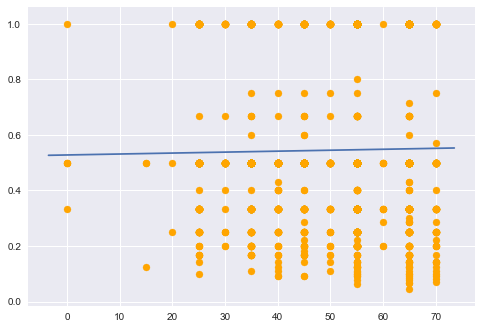

In [8]:
# 2b2) draw a scatter plot to see the general trend associated and 
# whether there is a possible linear or nonlinear relationship between 
# speed limits on roads and the death rate.

x = df['SP_LIMIT']
y = df['D_RATE']
plt.scatter(x,y, facecolor = 'orange')

axes = plt.gca()
m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')


Below are the data visualizations about number of drunk drives invloved in car accidents

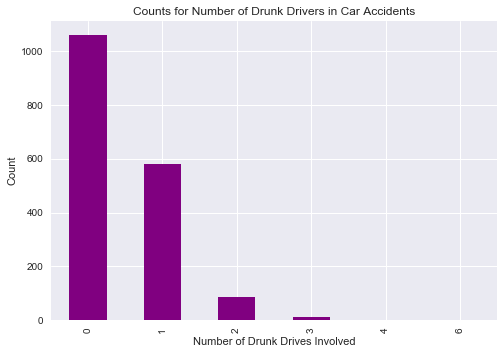

In [9]:
# 2c1) Plot a bar graph showing the number of drunk drivers in each car accidents.
# Use 'value_counts' to get the counts for each number of drunk drivers.
# Save the plot as 'no_Ddriver'

drunk_nu = df['DRUNK_DR']
drunk_number = drunk_nu.value_counts(normalize=False, sort=False, ascending=False, bins=None, dropna=True)
no_Ddriver = drunk_number.plot.bar(x="drunk#", y="frequency", facecolor = 'purple')
plt.title('Counts for Number of Drunk Drivers in Car Accidents')
plt.xlabel('Number of Drunk Drives Involved')
plt.ylabel('Count')
no_Ddriver = plt.gcf()

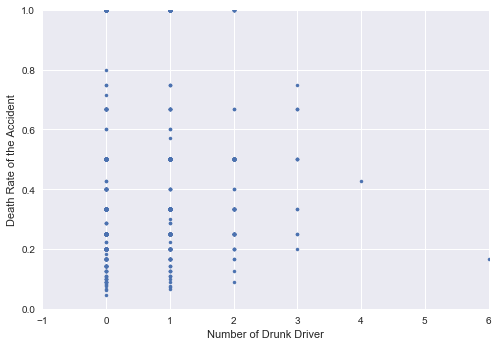

In [10]:
# 2c2) draw a scatter plot to see the general trend associated and 
# whether there is a possible linear or nonlinear relationship between 
# the number of drunk drivers involved and the death rate.

#x:number of drunk driver, y:death rate
f, ax = plt.subplots()
ax.plot(drunk_nu, D_RATE, '.')
plt.xlabel('Number of Drunk Driver'); plt.xlim([-1, 6]);
plt.ylabel('Death Rate of the Accident'); plt.ylim([0, 1]);


Find out correlations between the three factors

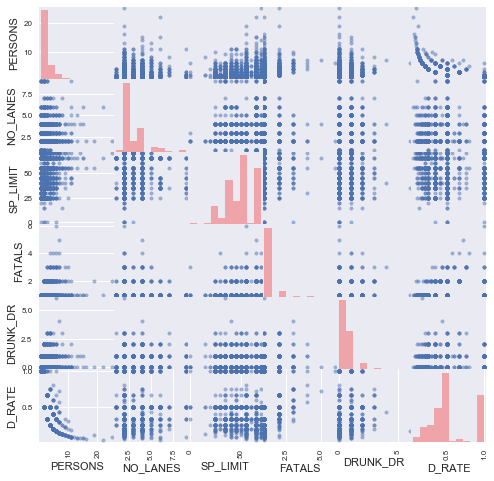

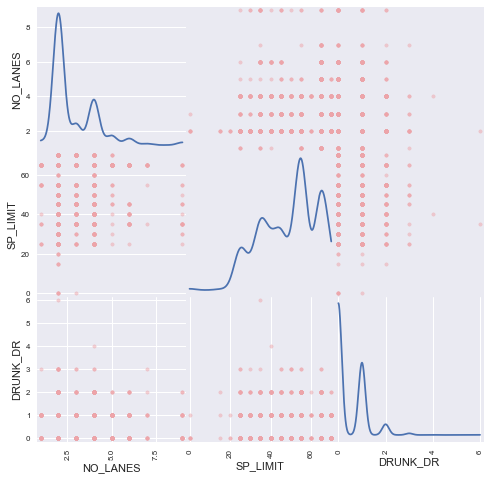

In [11]:
# 2d1) Use scatter_matrix() function from the panda to make a matrix scatterplot,
# see whether correlation exists among the number of lanes on roads, speed limit, 
# and number of drunk drivers involved in each accidents.

fig = pd.scatter_matrix(df,figsize=(8, 8),hist_kwds={'color':['#eea4a9']}) # The scatterplot of all variables.
df3 = df.drop('PERSONS', axis=1)
df3 = df3.drop('D_RATE', axis=1)
df3 = df3.drop('FATALS', axis=1)
fig2 = pd.scatter_matrix(df3,figsize=(8, 8),c='#eea4a9',diagonal='kde') # The scatterplot of only three variables (number of lanes, speed limit, and number of drunk drivers)



In [12]:
#2d1) Use the pandas.DataFrame method corr() to calculate 
# a correlation matrix that shows the correlation coefficient for each pair of variables. 

corr = df.corr()
print(corr) #this prints out all the Pearson's correlation coefficient for each columns.
corr_ls = df[['NO_LANES','SP_LIMIT']].corr()
print (corr_ls) 
#this prints out the Pearson's correlation coefficient between number of lanes and speed limit.
corr_ld = df[['NO_LANES','DRUNK_DR']].corr()
print (corr_ld) 
#this prints out the Pearson's correlation coefficient between number of lanes and number of drunk drivers.
corr_sd = df[['SP_LIMIT','DRUNK_DR']].corr()
print (corr_sd) 
#this prints out the Pearson's correlation coefficient between speed limit and number of drunk drivers.

           PERSONS  NO_LANES  SP_LIMIT    FATALS  DRUNK_DR    D_RATE
PERSONS   1.000000  0.066031  0.101528  0.292680  0.000820 -0.683246
NO_LANES  0.066031  1.000000  0.047837 -0.024762  0.039962 -0.102676
SP_LIMIT  0.101528  0.047837  1.000000  0.072557 -0.005587  0.016307
FATALS    0.292680 -0.024762  0.072557  1.000000  0.088566  0.048483
DRUNK_DR  0.000820  0.039962 -0.005587  0.088566  1.000000  0.016468
D_RATE   -0.683246 -0.102676  0.016307  0.048483  0.016468  1.000000
          NO_LANES  SP_LIMIT
NO_LANES  1.000000  0.047837
SP_LIMIT  0.047837  1.000000
          NO_LANES  DRUNK_DR
NO_LANES  1.000000  0.039962
DRUNK_DR  0.039962  1.000000
          SP_LIMIT  DRUNK_DR
SP_LIMIT  1.000000 -0.005587
DRUNK_DR -0.005587  1.000000


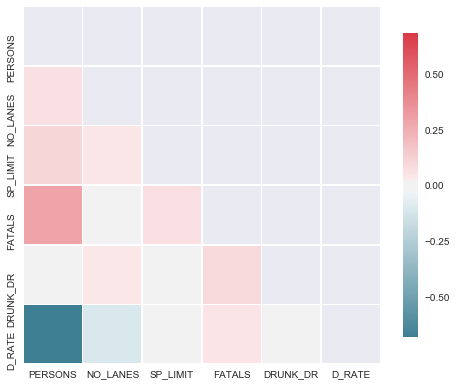

In [13]:
# A heatmap describing the strength of the correlations between each pair of variables.

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.65,
            square=True,linewidths=.5, cbar_kws={"shrink": .7}, ax=ax)

## Part 3: Data Analysis 

Below are the means, medians, and modes of each factors involoved in car accidents

In [14]:
# 3a) Find out the mean, median, and mode of the number of lanes involved in all car accidents
# save the value as 'meanL','medianL','modeL'
meanL = df['NO_LANES'].mean()
medianL = df['NO_LANES'].median()
modeL = df['NO_LANES'].mode()
mode_num = df['NO_LANES'].value_counts()
n_mode = mode_num.max()

print('Average number of lanes involved:', meanL)
print('Median number of lanes involved:', medianL)
print('Mode number of lanes involved:', modeL)
print('The frequency of mode is:', n_mode)

Average number of lanes involved: 2.84606547960942
Median number of lanes involved: 2.0
Mode number of lanes involved: 0    2
dtype: int64
The frequency of mode is: 1033


In [15]:
# 3b) Find out the mean, median, and mode of the speed limit involved in all car accidents
# save the value as 'meanSP','medianSP','modeSP'

meanSP = df['SP_LIMIT'].describe()[1]
medianSP = df['SP_LIMIT'].describe()[5]
modeSP = df['SP_LIMIT'].mode()
mode_num = df['SP_LIMIT'].value_counts()
#print(mode_num)
n_mode = mode_num.max()
n_5560 = mode_num[55] + mode_num[60]
n_6570 = mode_num[65] + mode_num[70]

p_5560 = 100*(n_5560/len(df))
p_6570 = 100*(n_6570/len(df))
print('Average speed limit: \t', meanSP)
print('Median number of speed limit: \t', medianSP)
print('Mode number of speed limit: \t', modeSP)
print('The frequency of mode is: \t', n_mode)

print(p_5560,'% of accidents were happened under 55 - 60 mhp speed limit:', n_5560)
print(p_6570,'% of accidents were happened under 65 - 70 mhp speed limit:', n_6570)

Average speed limit: 	 49.4399770247
Median number of speed limit: 	 55.0
Mode number of speed limit: 	 0    55
dtype: int64
The frequency of mode is: 	 482
28.3744974153 % of accidents were happened under 55 - 60 mhp speed limit: 494
25.4451464675 % of accidents were happened under 65 - 70 mhp speed limit: 443


In [16]:
# 3c) Use describe() method to find out the mean, median, and mode of the number of drunk driver involved in all car accidents
# save the value as 'meanD','medianD','modeD'

meanD = df['DRUNK_DR'].describe()[1]
medianD = df['DRUNK_DR'].describe()[5]
modeD = df['DRUNK_DR'].mode()
mode_num = df['DRUNK_DR'].value_counts()
n_drunk = len(df) - mode_num[0]
p_drunk = 100*(n_drunk/len(df))

print('Average number of drunk drivers: \t', meanD)
print('Median number of drunk drivers: \t', medianD)
print('Mode number of drunk drivers: \t', modeD)
print('Number of car accidents with drunk drivers involved: \t', n_drunk)
print('Percentage of car accidents with drunk drivers involved: \t', p_drunk)

Average number of drunk drivers: 	 0.460654796094
Median number of drunk drivers: 	 0.0
Mode number of drunk drivers: 	 0    0
dtype: int64
Number of car accidents with drunk drivers involved: 	 682
Percentage of car accidents with drunk drivers involved: 	 39.1728891442


Below is the linear model analysis for 'number of lanes' and 'death rate'

In [17]:
# 3d1) Create a new dataframe, called 'df1', which only includes data from 'NO_LANES' and 'D_RATE' column.

#df1 = pd.read_csv('AccidentData.csv')
#df1 = df1.drop('PERSONS', axis=1)
#df1 = df1.drop('SP_LIMIT', axis=1)
#df1 = df1.drop('DRUNK_DR', axis=1)
#df1 = df1.drop('VE_TOTAL', axis=1)
#df1 = df1.drop('PEDS', axis=1)
df1 = df
df1 = df1.drop(['PERSONS','SP_LIMIT','DRUNK_DR','FATALS'],axis=1)
#df1

In [18]:
# 3d2) Create a linear model to predict death rate from number of lanes (using df1 as data).
#  Use patsy.dmatrices to create the design matrices, calling the outputs 'outcome_1', 'predictors_1'
#  Create an OLS model (sm.OLS) using 'outcome_1' and 'predictors_1'. Call it 'mod_1'.
#  Fit the model, assigning it to 'res_1'

outcome_1, predictors_1 = patsy.dmatrices('D_RATE ~ NO_LANES', df1)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [19]:
# Print out the summary results of the model fitting
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 D_RATE   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     18.53
Date:                Tue, 13 Jun 2017   Prob (F-statistic):           1.77e-05
Time:                        19:32:55   Log-Likelihood:                -284.74
No. Observations:                1741   AIC:                             573.5
Df Residuals:                    1739   BIC:                             584.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6066      0.016     37.974      0.0

In [20]:
#3d3)
#- Based on the model we ran above (using alpha value of 0.05), p = 0.000, 
#  which is smaller than 0.05. Therefore, the number of lanes can significantly predict death rate.


Below is the linear model analysis for 'speed limit' and 'death rate'

In [21]:
# 3e1) Create a new dataframe, called 'df2', which only includes data from 'SP_LIMIT' and 'D_RATE column.

df2 = df
df2 = df2.drop(['PERSONS','NO_LANES','DRUNK_DR','FATALS'],axis=1)
#df2

In [22]:
# 3e2) Create a linear model to predict death rate from speed limit (using df2 as data).
#  Use patsy.dmatrices to create the design matrices, calling the outputs 'outcome_2', 'predictors_2'
#  Create an OLS model (sm.OLS) using 'outcome_2' and 'predictors_2'. Call it 'mod_2'.
#  Fit the model, assigning it to 'res_2'

outcome_2, predictors_2= patsy.dmatrices('D_RATE ~ SP_LIMIT', data = df2)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

In [23]:
# Print out the summary results of the model fitting
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 D_RATE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4625
Date:                Tue, 13 Jun 2017   Prob (F-statistic):              0.497
Time:                        19:32:55   Log-Likelihood:                -293.74
No. Observations:                1741   AIC:                             591.5
Df Residuals:                    1739   BIC:                             602.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5276      0.026     20.486      0.0

In [24]:
# 3e3) Based on the model we ran above (using alpha value of 0.05), p = 0.497, which is larger 
#than 0.05. Therefore, the speed limit cannot significantly predict death rate.



Below is the linear model analysis for 'number of drunk drivers' and 'death rate'

In [25]:
# 3f1) Create a new dataframe, called 'df3', which only includes data from 'DRUNK_DR' and 'D_RATE column.
df3 = df
df3 = df3.drop(['PERSONS','NO_LANES','SP_LIMIT','FATALS'],axis=1)
#Your code here

In [26]:
# 3f2) Create a linear model to predict death rate from the number of drunk drivers (using df3 as data).
#  Use patsy.dmatrices to create the design matrices, calling the outputs 'outcome_3', 'predictors_3'
#  Create an OLS model (sm.OLS) using 'outcome_3' and 'predictors_3'. Call it 'mod_3'.
#  Fit the model, assigning it to 'res_3'

outcome_3, predictors_3 = patsy.dmatrices('D_RATE ~ DRUNK_DR', df3)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()

In [27]:
# Print out the summary results of the model fitting
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 D_RATE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4717
Date:                Tue, 13 Jun 2017   Prob (F-statistic):              0.492
Time:                        19:32:55   Log-Likelihood:                -293.73
No. Observations:                1741   AIC:                             591.5
Df Residuals:                    1739   BIC:                             602.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5411      0.008     64.107      0.0

In [28]:
# 3f3) Based on the model we ran above (using alpha value of 0.05), p = 0.492, which is larger 
#than 0.05. Therefore, the number of drunk drivers cannot significantly predict death rate.

Below is the linear model analysis that use 'number of drunk drivers' and 'number of lanes' to predict death rate

In [29]:
# 4b+c) number of lanes and drunk driver
# 4b+c 1) create a new dataframe "df_lanedrunk", with only number of lanes, number of drunk drivers and
# death rate

df_lanedrunk = df
df_lanedrunk = df_lanedrunk.drop(['PERSONS','SP_LIMIT','FATALS'],axis=1)
#df_lanedrunk

In [30]:
# 4b+c 2) Create a linear model to predict death rate from the number of lanes and drunk drivers(using df_lanedrunk as data).
#  Use patsy.dmatrices to create the design matrices, calling the outputs 'outcome_lanedrunk', 'predictors_lanedrunk'
#  Create an OLS model (sm.OLS) using 'outcome_lanedrunk' and 'predictors_lanedrunk'. Call it 'mod_lanedrunk'.
#  Fit the model, assigning it to 'res_lanedrunk'

outcome_lanedrunk, predictors_lanedrunk = patsy.dmatrices('D_RATE ~ DRUNK_DR + NO_LANES', df_lanedrunk)
mod_lanedrunk = sm.OLS(outcome_lanedrunk, predictors_lanedrunk)
res_lanedrunk = mod_lanedrunk.fit()

In [31]:
# Print out the summary results of the model fitting
print(res_lanedrunk.summary())

                            OLS Regression Results                            
Dep. Variable:                 D_RATE   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     9.635
Date:                Tue, 13 Jun 2017   Prob (F-statistic):           6.89e-05
Time:                        19:32:55   Log-Likelihood:                -284.37
No. Observations:                1741   AIC:                             574.7
Df Residuals:                    1738   BIC:                             591.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6029      0.017     36.438      0.0

In [32]:
# 4b+c 3) Based on the model we ran above (using alpha value of 0.05), p = 0.388, which is larger 
#than 0.05. Therefore, the number of lanes and drunk drivers cannot significantly 
#predict death rate.

Below is the linear model to predict death rate from 'speed limit' and 'the number of drunk drivers'

In [33]:
# 4a+c) speed limit and drunk drivers
# 4a+c 1) create a new dataframe "df_speeddrunk", with only speed limit, number of drunk drivers and death rate
df_speeddrunk = df
df_speeddrunk = df_speeddrunk.drop(['PERSONS','NO_LANES','FATALS'], axis = 1)
#df_speeddrunk

In [34]:
# 4a+c 2) Create a linear model to predict death rate from speed limit and drunk drivers (using df_speeddrunk as data).
#  Use patsy.dmatrices to create the design matrices, calling the outputs 'outcome_speeddrunk', 'predictors_speeddrunk'
#  Create an OLS model (sm.OLS) using 'outcome_speeddrunk' and 'predictors_speeddrunk'. Call it 'mod_speeddrunk'.
#  Fit the model, assigning it to 'res_speeddrunk'
outcome_speeddrunk, predictors_speeddrunk = patsy.dmatrices('D_RATE ~ SP_LIMIT + DRUNK_DR', df_speeddrunk)
mod_speeddrunk = sm.OLS(outcome_speeddrunk, predictors_speeddrunk)
res_speeddrunk = mod_speeddrunk.fit()

In [35]:
# Print out the summary results of the model fitting
print(res_speeddrunk.summary())

                            OLS Regression Results                            
Dep. Variable:                 D_RATE   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4696
Date:                Tue, 13 Jun 2017   Prob (F-statistic):              0.625
Time:                        19:32:55   Log-Likelihood:                -293.50
No. Observations:                1741   AIC:                             593.0
Df Residuals:                    1738   BIC:                             609.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5241      0.026     19.968      0.0

In [36]:
# 4a+c 3) Based on the model we ran above (using alpha value of 0.05), p = 0.494, which is larger 
#than 0.05. Therefore, the speed limit and drunk drivers cannot significantly 
#predict death rate.

Below is the linear mode to predict death rate from the number of lanes and speed limit. 

In [37]:
# 4a+b number of lanes and speed limit
# 4a+b 1) Create a new dataframe "df_lane_speed", with only number of lanes, speed limit and death rate

df_lane_speed = df
df_lane_speed = df_lane_speed.drop(['PERSONS','DRUNK_DR','FATALS'],axis=1)
#df_lane_speed

In [38]:
# 4a+b 2) Create a linear model to predict number of lanes and speed limit from death rate (df_lane_speed ).
#  Use patsy.dmatrices to create the design matrices, calling the outputs 'outcome_lane_speed', 'predictors_lane_speed'
#  Create an OLS model (sm.OLS) using 'outcome_lane_speed' and 'predictors_laned_speed'. Call it 'mod_lane_speed'.
#  Fit the model, assigning it to 'res_lane_speed'

outcome_lane_speed, predictors_lane_speed = patsy.dmatrices('D_RATE ~ SP_LIMIT + NO_LANES', df_lane_speed)
mod_lane_speed = sm.OLS(outcome_lane_speed, predictors_lane_speed)
res_lane_speed = mod_lane_speed.fit()

print(res_lane_speed.summary())

                            OLS Regression Results                            
Dep. Variable:                 D_RATE   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     9.660
Date:                Tue, 13 Jun 2017   Prob (F-statistic):           6.73e-05
Time:                        19:32:55   Log-Likelihood:                -284.35
No. Observations:                1741   AIC:                             574.7
Df Residuals:                    1738   BIC:                             591.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5852      0.029     20.280      0.0

In [39]:
# 4a+b 3) Based on the model we ran above (using alpha value of 0.05), p = 0.373, which is much larger than 0.05. 
#Therefore, we cannot predict death rate from the number of lanes and speed limit effectively.

Below is the linear mode to predict death rate from all three variables 

In [40]:
# Linear model for all three variables:
outcome_three, predictors_three = patsy.dmatrices('D_RATE ~ SP_LIMIT + DRUNK_DR + NO_LANES', df)
mod_three = sm.OLS(outcome_three, predictors_three)
res_three = mod_three.fit()
# Print out the summary results of the model fitting
print(res_three.summary())

                            OLS Regression Results                            
Dep. Variable:                 D_RATE   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.691
Date:                Tue, 13 Jun 2017   Prob (F-statistic):           0.000173
Time:                        19:32:56   Log-Likelihood:                -283.97
No. Observations:                1741   AIC:                             575.9
Df Residuals:                    1737   BIC:                             597.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5813      0.029     19.904      0.0

In [42]:
#Based on the model we ran above (using alpha value of 0.05), p = 0.370, which is much larger than 0.05. 
#Therefore, we cannot predict death rate from the the combination of all three variables effectively.

# Findings
Our hypothesis is that "Car accidents with higher death rates were happened in areas with higher speed limit and less lanes, as well as with drunk drivers involved". Through this data analysis process, we were expecting to find some linar relationships between death rate and the speed limit, number of lanes and the number of drunk drivers involved. 

While we were analyzing the relationship between one of the above variables and the death rate, the only linear relationship that we found was between the 'number of lanes' and 'death rate'.
- Based on the linear model analysis for 'number of lanes' and 'death rate' that we ran above （part 3d2）, p value is 0.00, which indicades the significance of this linar relationship. 
- Moreover, the Pearson's coefficient for the 'number of lanes' and 'death rate' is -0.103 (part 2d1), which indicates that these two variables are negatively correlated. 
- Therefore, it supports our hypothesis that 'car accidents with higher death rates were happened in areas with less number of lanes' 
- In addition, based on the bar graph and mode (part 2a1 & part 3a), we found that most car accidents (1033 out of 1471) were happened in two-lane roads. 

Unfortunatly, we didn't find any linear relationship that can predict death rate based on speed limit or the number of drunk drivers invloved. The reason is that all the p-values associated were greater than 0.05, which shows that these variables cannot significantly predict death rate. 
- p value of linear model analysis for 'speed limit' and 'death rate'(part 3d2): 0.497
- p value of linear model analysis for 'number of drunk drivers involved' and 'death rate'(part 3f2): 0.492

Then, we build linear models which predict death rate from the combination of two out of the three variables: 'number of lanes + number of drunk drivers', 'number of lanes + speed limit', 'speed limit + number of drunk drivers', and the combination of all the three variables. 
- p value of linear model analysis for 'number of lanes + number of drunk drivers' and 'death rate': 0.388
- p value of linear model analysis for 'number of lanes + speed limit' and 'death rate': 0.373
- p value of linear model analysis for 'speed limit + number of drunk drivers': 0.494
- p value of linear model analysis for all three variables: 0.370
All of the above p values are larger than 0.05. 

Therefore, based on the modes we ran above, we cannot fully support our hypothsis.

However, according to the bar graphs and mode number (part 2b1 & part 3b), we found that most car accidents were happened in areas with speed limit of 55 - 60 mph (494 out of 1741, 28.37%) and 65 - 70 mph (443 out of 1741, 25.45%), so driver under a high speed limit may increse the risk of encountering car accidents. 

We also found that 39.17% car accidents were happened with drunk drivers invloved (part 3c). Even thought the number of drunk drivers cannot significantly perdict death rates, this percentage still shows that drunk driving is dangerous.  

# Discussion and Conclusion
It is reasonable that hypothesis does not work as expected, since 1741 observations might still be too small to generate a result to support out hypothesis. Moreover, there are many variants in the real world that are easily to be ignored. 

There are several potential confounds, which might have influenced our study. For example, the age when people first start to drive. Some people learn how to drive when they were still  teenegers, but some people don’t know how to drive until the age of 20. And normally, novices drive more carefully and tend to cause less fatal accidents. Also, conditions of the roads may also contribute to the numbers of car accidents. If the road is not flat, or there are small rocks on the streets, the numbers of accidents occurred in this area may be larger than the numbers of accidents in others areas. There are many variants for individual driver and individual street, and they can all be possible confounds in our study.

We avoided potential pitfalls that might occour in a study. There are several pitfalls in a statistical study: sources of bias, errors in methodology (statistical power, multiple comparisons, measurement error), problems with interpretation (confusion over significance, precision and accuracy, causality, graphical representations). 
- In our study, our source is not biased since we use a huge dataset which has every information we need. 
- Since we were using Python to analyse our data, and the methods we were using were those we learned from this class. The only new method that we will apply is polynomial linear regression, and in order to avoid errors, we did enough researches and communicated with TAs about our method. Also, because we were not using power, level of significance or other statistical tools to analyse, we did not encounter many problems in our methodology.

In conclusion, we cannot support the hypothsis that "car accidents with higher death rates were happened in areas with higher speed limit and less lanes, as well as with drunk drivers involved". The reason is that there is no linear relationship bewteen the combination of the three variables (speed limit, number of lanes, or number of drunk drivers) and death rate. However, there is a linar relationship number of lanes and death rate, and increasing the number of lanes on road would decrese the death rate of car accidents. 
